[codebasics](https://www.youtube.com/watch?v=J_LnPL3Qg70&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


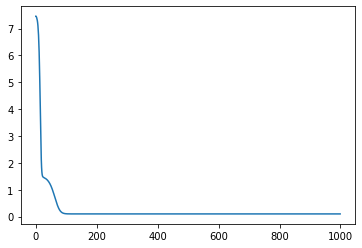

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

lr = 1.6e-2  #1e-2
epoch = int(1e3)

if 0:
    df = pd.read_csv('homeprices.csv')
elif 1:
    data = {
        'area': [2600,3000,3200,3600,4000,4100],
        'bedrooms': [3,4,np.nan,3,5,6],
        'age': [20,15,18,30,8,8],
        'price': [550000,565000,610000,595000,760000,810000]
        }
    df = pd.DataFrame(data)

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median()) 

if 0:
    # not good
    pass
elif 1:
    # good
    df = (df-df.mean()) / df.std()

x_data = df[['area','bedrooms','age']].values.astype(np.float32) # (6,3)
# y_data = df.price.values.astype(np.float32).reshape((-1,1)) # (6,1)

x = tf.placeholder(tf.float32, shape=(None,3)) # (?,3)
# y = tf.placeholder(tf.float32, shape=(None,1)) # (?,1)

b1 = tf.get_variable('b1', (2,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
W1 = tf.get_variable('W1', (3, 2), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
x1 = (x @ W1) + b1

b2 = tf.get_variable('b2', (3,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
W2 = tf.get_variable('W2', (2, 3), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
x_pca = (x1 @ W2) + b2

loss = tf.nn.l2_loss(x - x_pca)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    loss_trace = []
    feed_dict = {x: x_data}
    for i in range(epoch):
        if i == 0:
            loss_run = sess.run(loss, feed_dict=feed_dict)
        else:
            loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
        loss_trace.append(loss_run) 
        
plt.plot(loss_trace)
plt.show()

(2500, 3)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


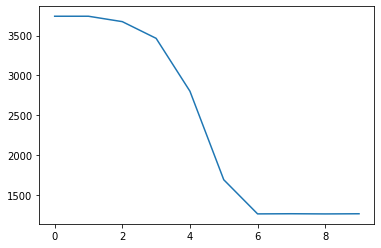

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lr = 4e-4  #1e-2
epoch = int(1e1)

np.random.seed(0)
tf.set_random_seed(0)

def data_loading():

    x = np.linspace(-1, 1)
    y = np.linspace(-1, 1)
    x_grid, y_grid = np.meshgrid(x, y)
    z0_grid = x_grid**2 + y_grid**2
    
    ep_train = np.random.randn(x_grid.shape[0], x_grid.shape[1])
    ep_test = np.random.randn(x_grid.shape[0], x_grid.shape[1])
    
    z_grid_train = z0_grid + 0.3 * ep_train
    z_grid_test = z0_grid + 0.3 * ep_test

    X = x_grid.reshape([-1, 1])
    Y = y_grid.reshape([-1, 1])
    Z_train = z_grid_train.reshape([-1, 1])
    Z_test = z_grid_test.reshape([-1, 1])

    x_train = np.hstack([X, Y, Z_train]).astype(np.float32)
    x_test = np.hstack([X, Y, Z_test]).astype(np.float32)

    return x_train, x_test

x_train, _ = data_loading()
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
print(x_train.shape)

x_data = x_train

x = tf.placeholder(tf.float32, shape=(None,3)) # (?,3)
# y = tf.placeholder(tf.float32, shape=(None,1)) # (?,1)

b1 = tf.get_variable('b1', (2,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
W1 = tf.get_variable('W1', (3, 2), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
x1 = (x @ W1) + b1

b2 = tf.get_variable('b2', (3,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
W2 = tf.get_variable('W2', (2, 3), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
x_pca = (x1 @ W2) + b2

loss = tf.nn.l2_loss(x - x_pca)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    loss_trace = []
    feed_dict = {x: x_data}
    for i in range(epoch):
        if i == 0:
            loss_run = sess.run(loss, feed_dict=feed_dict)
        else:
            loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
        loss_trace.append(loss_run) 
        
plt.plot(loss_trace)
plt.show()